# Description

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved.

Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the back poorly.

Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

# DS
ALLLife bank Data Description:

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

- Customer Key : Cudtomer Identification Number
- Avg_Credit_Limit : Average Credit Card limit
- Total_Credit_Cards : the total number of credit cards the customer has.
- Total_visits_bank : Number of times customer has visited the bank for any queries
- Total_visits_online : Online contact count of the customer
- Total_calls_made : Number of calls customer has made to call centre.

## Import the libs

In [84]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries to tune model, get different metric scores, and split data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


from scipy.cluster.hierarchy import fcluster
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


# to suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [85]:
orig_data = pd.read_excel('Credit Card Customer Data.xlsx')

In [86]:
# copying data to another variable to avoid any changes to original data
data = orig_data.copy()

In [87]:
# Check head
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [88]:
# tail
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [89]:
# shape
data.shape

(660, 7)

In [90]:
# Checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### No null values, all cols are numerical

In [91]:
# Summary of DS
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.000,330.500,190.670,1.000,165.750,330.500,495.250,660.000
Customer Key,660.000,55141.444,25627.772,11265.000,33825.250,53874.500,77202.500,99843.000
Avg_Credit_Limit,660.000,34574.242,37625.488,3000.000,10000.000,18000.000,48000.000,200000.000
Total_Credit_Cards,660.000,4.706,2.168,1.000,3.000,5.000,6.000,10.000
Total_visits_bank,660.000,2.403,1.632,0.000,1.000,2.000,4.000,5.000
Total_visits_online,660.000,2.606,2.936,0.000,1.000,2.000,4.000,15.000
Total_calls_made,660.000,3.583,2.865,0.000,1.000,3.000,5.000,10.000


## Observations

- SI_No - Serial Number of the records to be dropped as it - doesnt add value to analysus
- Customer Key: Can be dropped - does not add value to analysis
- Avg_Credit_Limit:  Avg_Credit_Limit of customers is around 35K 
- Total_Credit_Cards: On average the customers have more than 4 credit cards, with maximum of 10 credit cards.
- Total_visits_bank: Half of the customers have made atleast 2 visits to the bank, where maximum number of visits to the bank by customers is 5.
- Total_visits_online: Online visits are more in comparison to bank visit and seems obvious with the higher accessibilty quotient. Average online visits of the customer is 2.6 and maximum goes as high as 15.
- Total_calls_made: Number of calls made  an average close to 3.5.

## Duplicate cases?

In [92]:
(data['Customer Key'].value_counts() > 1).value_counts()

False    650
True       5
Name: Customer Key, dtype: int64

In [93]:
data['Customer Key'].value_counts()

50706    2
37252    2
97935    2
96929    2
47437    2
        ..
58708    1
92501    1
33110    1
92503    1
75775    1
Name: Customer Key, Length: 655, dtype: int64

## Observations

5 customer keys repeated twice with customer keys 47437, 37252, 97935, 96929, 50706

## Drop the columns we don't need

In [94]:
data.drop(['Sl_No'],axis=1,inplace=True)

In [95]:
# Drop dup customer key, keep first for analyysis
data = data.drop_duplicates('Customer Key')

In [96]:
data.drop(['Customer Key'],axis=1,inplace=True)

# EDA

## Univariate

In [97]:
# Workaround to avoid font warnings for font caches - I hate those warnings
# https://github.com/matplotlib/matplotlib/issues/13139
import matplotlib.font_manager

In [98]:
# Utility function from lecture notes to draw box plot - nothing fancy
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [99]:
# Utility Function to create the bar plots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    '''
    

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

# Avg_Credit_Limit

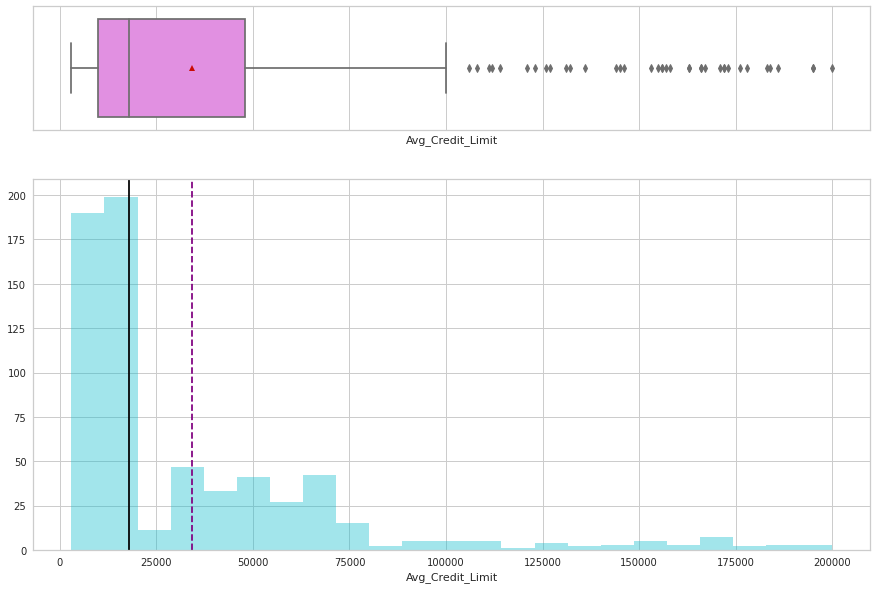

In [100]:
histogram_boxplot(data['Avg_Credit_Limit'])

- Avg_Credit_Limit is right skewed with average credit limit of near 35K and median of 18K.
- No outliers

##  Total_Credit_Cards

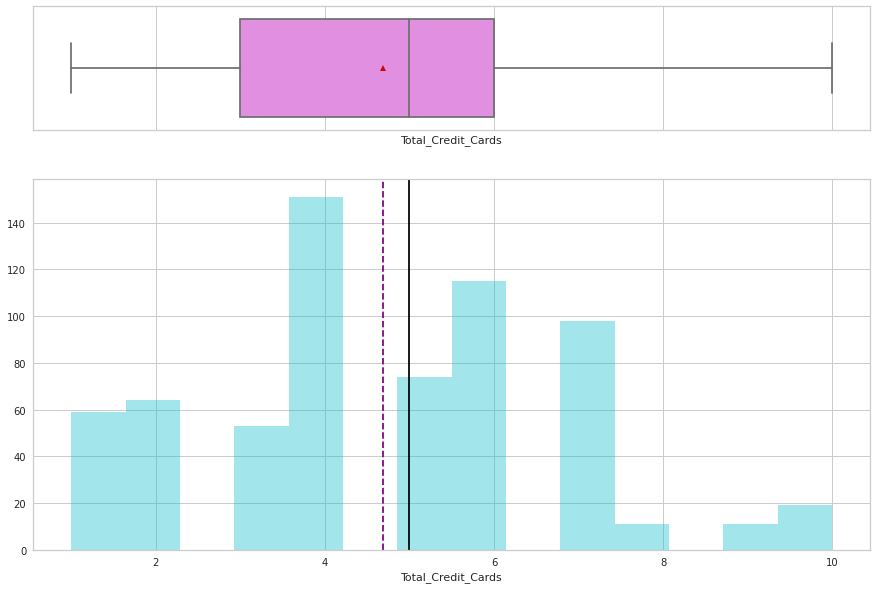

In [101]:
histogram_boxplot(data['Total_Credit_Cards'])

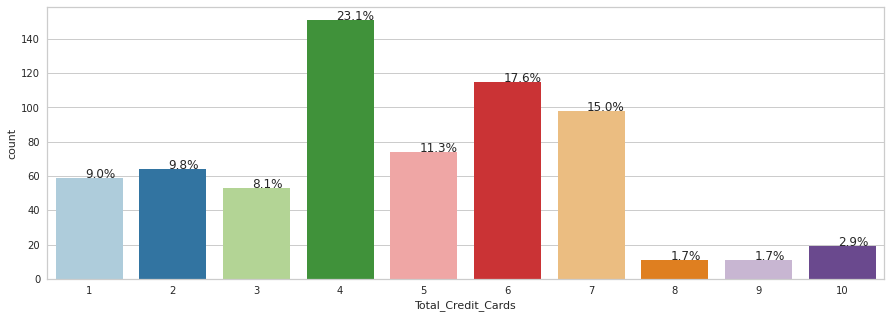

In [102]:
# Workaround to avoid font warnings for font caches - I hate those warnings
# https://github.com/matplotlib/matplotlib/issues/13139
import matplotlib.font_manager
perc_on_bar('Total_Credit_Cards')

* The customers are having 1 to 10 credit cards with mean near to 5 and median equal to 5.
* More than 65% of customers are having 4 to 7 number of credit cards

## Observations on Total_visits_bank

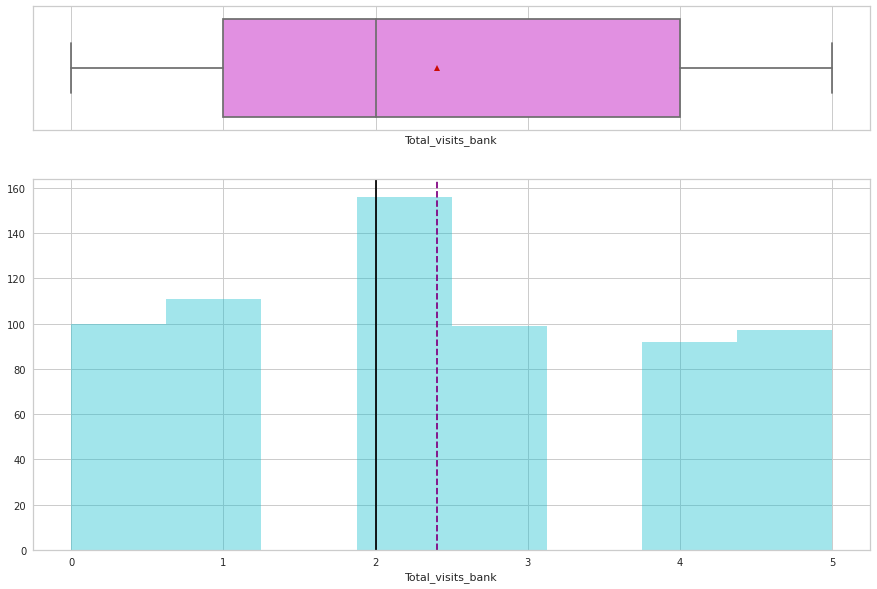

In [103]:
histogram_boxplot(data['Total_visits_bank'])

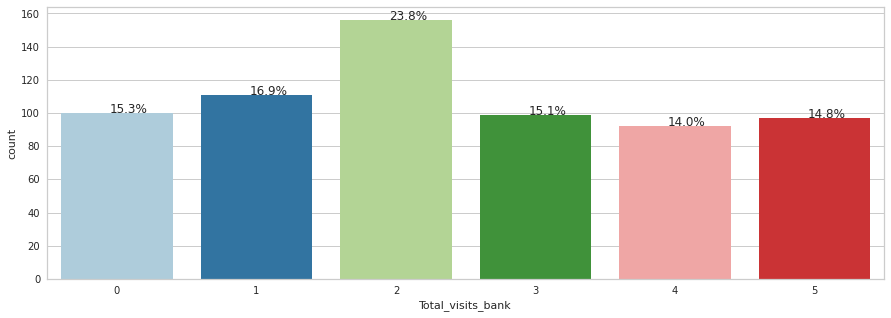

In [104]:
perc_on_bar('Total_visits_bank')

* Number of bank visits for the customers are from 0 to 5, more of normally distributed with avearage of 2.4.
* Nearly uniform distribution was seen for number of visits of the customers, with a bit higer percentage (23.9%) have visited the bank twice.

## otal_visits_online

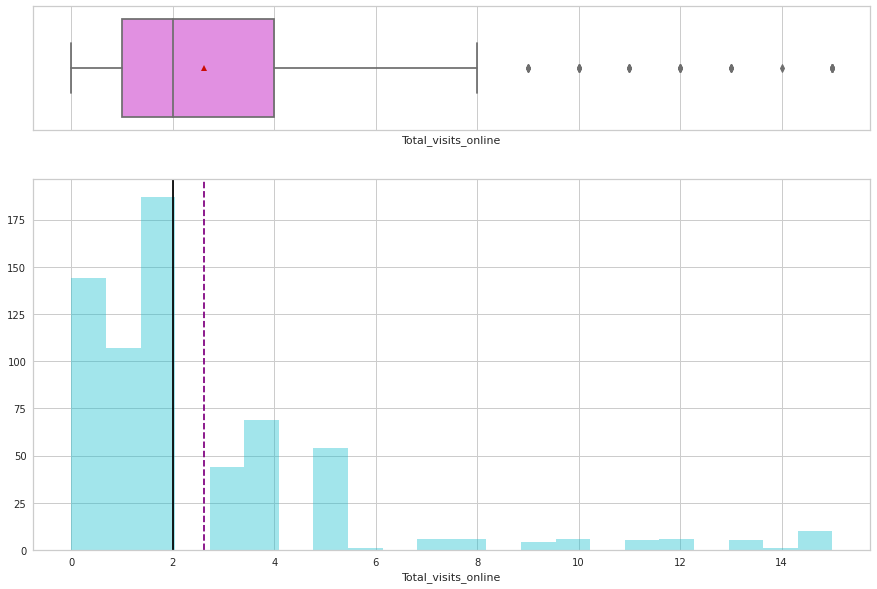

In [105]:
histogram_boxplot(data['Total_visits_online'])

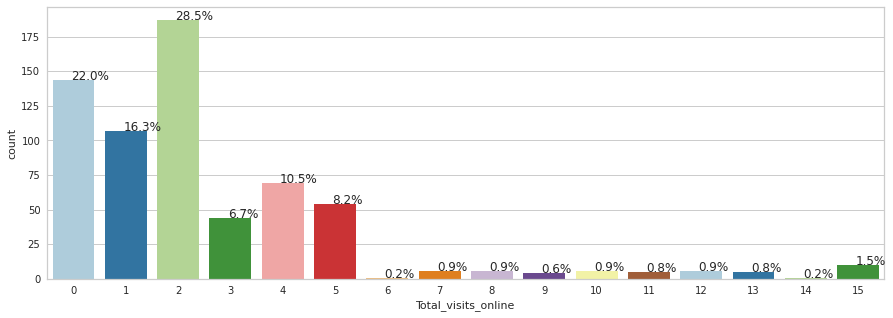

In [106]:
perc_on_bar('Total_visits_online')

- Most the customer have less than 6 visits.
- 21.8% of customers have not used the online service.
- 66.9% of customers have used online twice or less.

## Total_calls_made

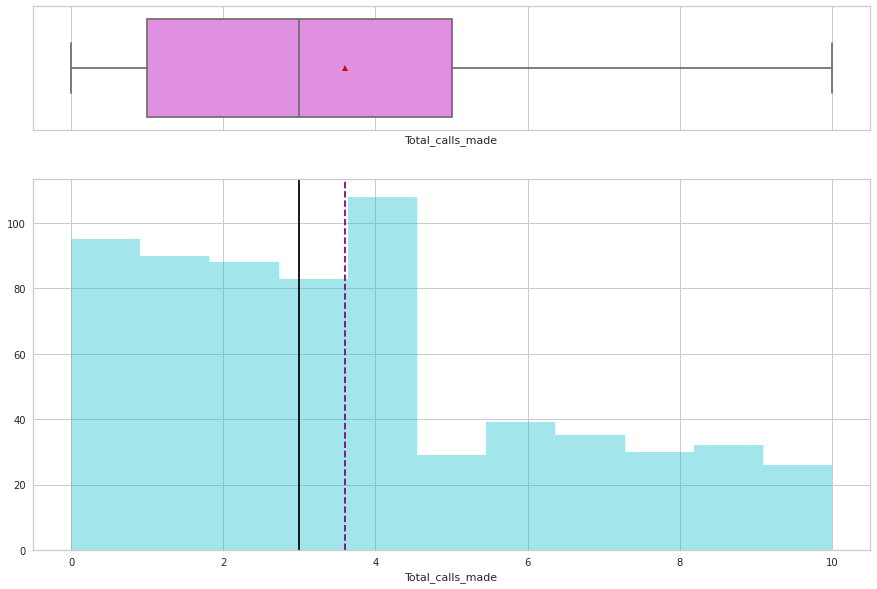

In [107]:
histogram_boxplot(data['Total_calls_made'])

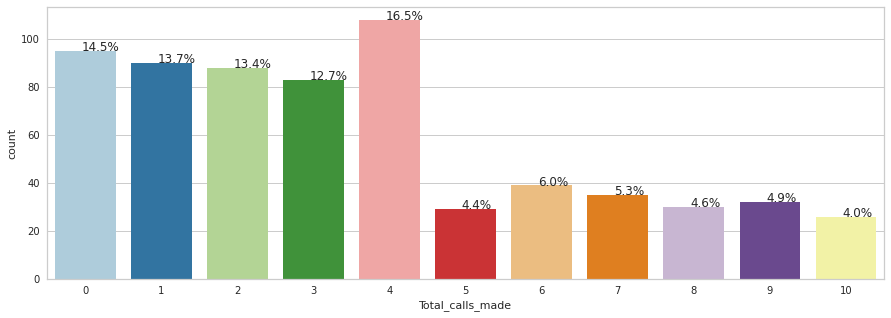

In [108]:
perc_on_bar('Total_calls_made')

* The average number of calls made by customers range is 3.5 with median 3.
* Only 7.5% of the customers were inactive for more than 3 months.

## Bivariate

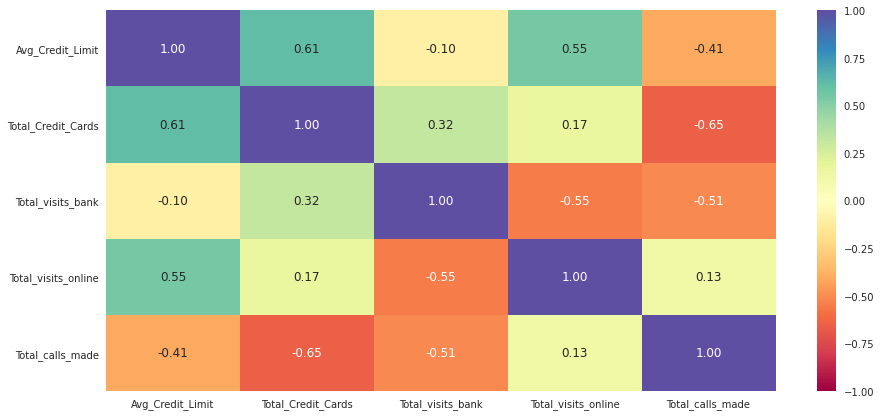

In [109]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

<Figure size 1080x504 with 0 Axes>

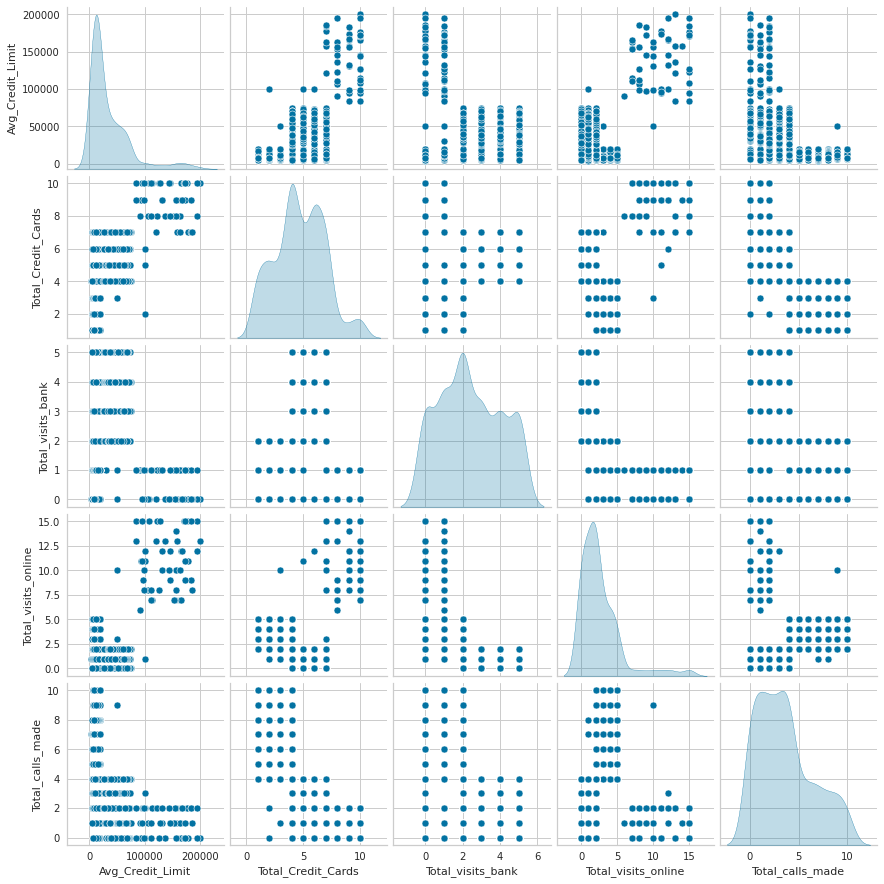

In [110]:
plt.figure(figsize=(15,7))
sns.pairplot(data,diag_kind='kde')
plt.show()

- -ver corr between Total_visits_bank and Total_visits_online
- -ver corr of (-0.51) between Total_visits_bank and Total_calls_made , that infers the similar trend that customers who are viting bank more often, doesn't use call service.

## Data Pre-preporcesing && trying to find clusters

In [111]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1           

lower=Q1-1.5*IQR     
upper=Q3+1.5*IQR

In [112]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Avg_Credit_Limit      5.802
Total_Credit_Cards    0.000
Total_visits_bank     0.000
Total_visits_online   5.649
Total_calls_made      0.000
dtype: float64

- don't think we need to treat outliers here via scaling or what not. we would like to know why they exist for the business case

## Find insights for clusters visually

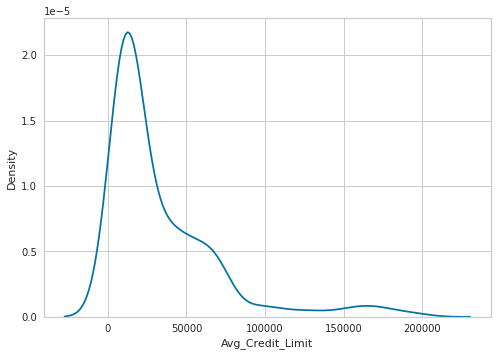

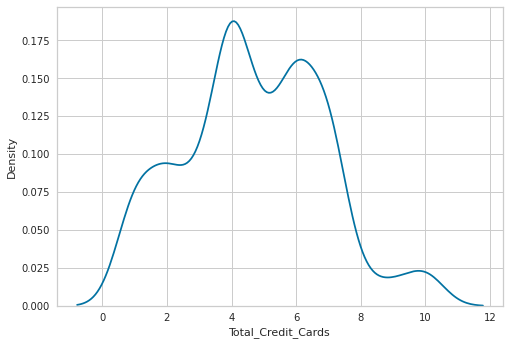

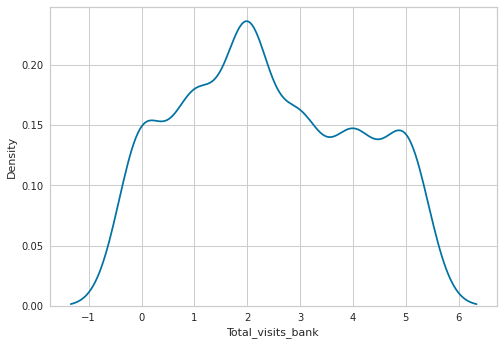

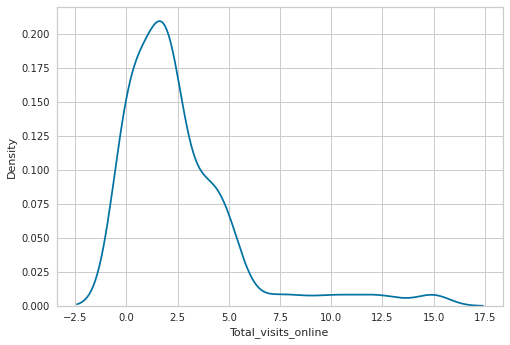

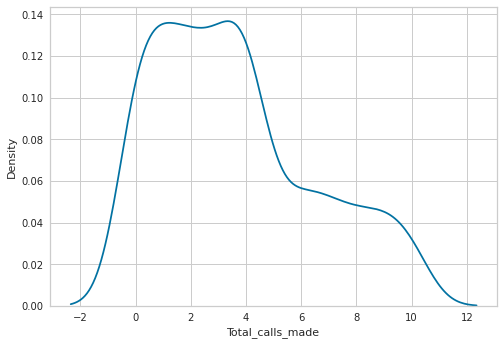

In [113]:
import seaborn as sns

for i in data.columns:
    sns.distplot(data[i],hist=False,)
    plt.show()

- See we have possible 3 clusters? 

## Clean up data for modelling

In [114]:
## Utility functions for find outliers - source Lecture 3 - MLS
## https://jovian.ai/tanyachawla/outliers
def outliers_action(data,col):
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) 
                     
    return data

def outliers_action_all(data, col_list):
    for c in col_list:
        data = outliers_action(data,c)

        return data

In [115]:
col = data.select_dtypes(include=np.number).columns.tolist()

In [116]:
data = outliers_action_all(data,col)

In [117]:
# Scaling the data set before clustering
subset=data[col].copy()

## K-means cluster

Number of Clusters: 1 	Average Distortion: 2.0443530071491014
Number of Clusters: 2 	Average Distortion: 1.4852012536807688
Number of Clusters: 3 	Average Distortion: 1.181814885591652
Number of Clusters: 4 	Average Distortion: 1.0687933711711466
Number of Clusters: 5 	Average Distortion: 1.001040175708282
Number of Clusters: 6 	Average Distortion: 0.9456409560066164
Number of Clusters: 7 	Average Distortion: 0.9090526556951047
Number of Clusters: 8 	Average Distortion: 0.8857271857559009


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

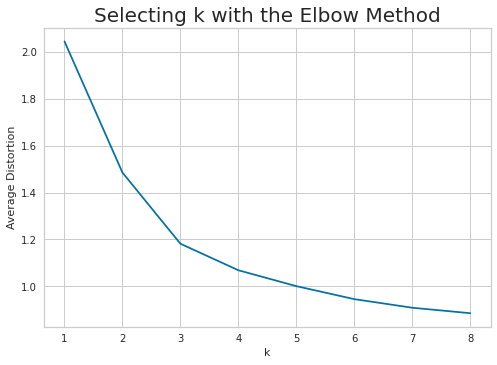

In [118]:
import matplotlib.font_manager

clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    ##creating pipeline
    preprocessor = Pipeline([("scaler", StandardScaler()),])
    clusterer = Pipeline([("kmeans",KMeans(
                       n_clusters=k,random_state=1
                       ))])

    pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
    
    pipe.fit(subset)
    
    #predicted_labels = pipe["clusterer"]["kmeans"].labels_
    #prediction=pipe.predict(subset_scaled_df)
    subset_scaled_df = pipe["preprocessor"].transform(subset)
    
    distortion=sum(np.min(cdist(subset_scaled_df, pipe["clusterer"]["kmeans"].cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

In [119]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    preprocessor = Pipeline([("scaler", StandardScaler()),])
    clusterer = Pipeline([("kmeans",KMeans(
                       n_clusters=n_clusters,random_state=1
                       ))])

    pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
    
    pipe.fit(subset)
    
    preds = pipe["clusterer"]["kmeans"].labels_
    subset_scaled_df = pipe["preprocessor"].transform(subset)
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41388548264460095)
For n_clusters = 3, silhouette score is 0.5075035671327102)
For n_clusters = 4, silhouette score is 0.379950520643679)
For n_clusters = 5, silhouette score is 0.35049668536036965)
For n_clusters = 6, silhouette score is 0.27291464530218246)
For n_clusters = 7, silhouette score is 0.2679613389063621)
For n_clusters = 8, silhouette score is 0.24976075558756158)
For n_clusters = 9, silhouette score is 0.23712787969076138)


Text(0.5, 1.0, 'silhouette score for different number of clusters')

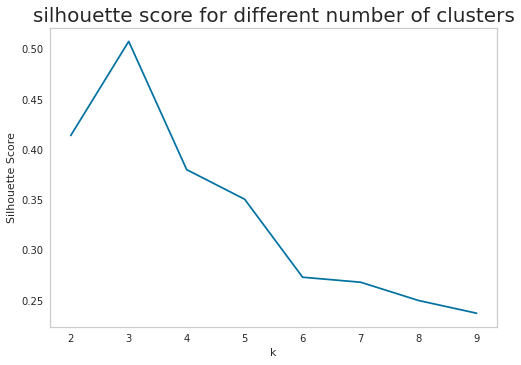

In [120]:
plt.plot(cluster_list,sil_score)
plt.grid()
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('silhouette score for different number of clusters', fontsize=20)

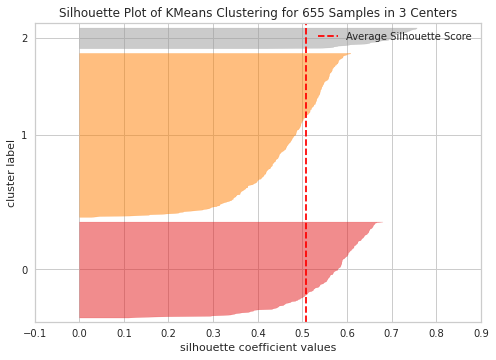

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 655 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [121]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

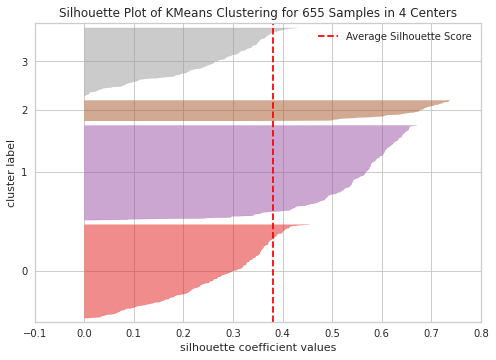

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 655 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [122]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

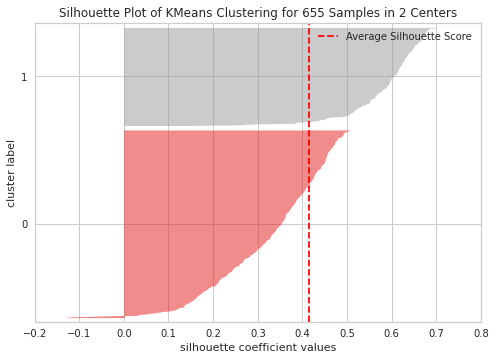

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 655 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [123]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

## Obversatrion
* n=3 can be a good choice for the clustering

## K Means Clustering n=3 clusters

In [124]:
preprocessor = Pipeline([("scaler", StandardScaler()),])
clusterer = Pipeline([("kmeans",KMeans(
                   n_clusters=3,random_state=29
                   ))])

pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

pipe.fit(subset) #fitting to the model
data_k = data.copy()
data_k['K_means_segments'] = pipe["clusterer"]["kmeans"].labels_ #cluster labels

In [125]:
cluster_profile_k = data_k.groupby('K_means_segments').mean()
cluster_profile_k['count_in_each_segment'] = data_k.groupby('K_means_segments')['Total_Credit_Cards'].count().values

In [126]:
cluster_profile_k

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33604.712,5.505,3.495,0.976,2.005,382
1,12174.107,2.411,0.933,3.554,6.871,224
2,102612.245,8.776,0.592,10.980,1.102,49


<AxesSubplot:xlabel='K_means_segments'>

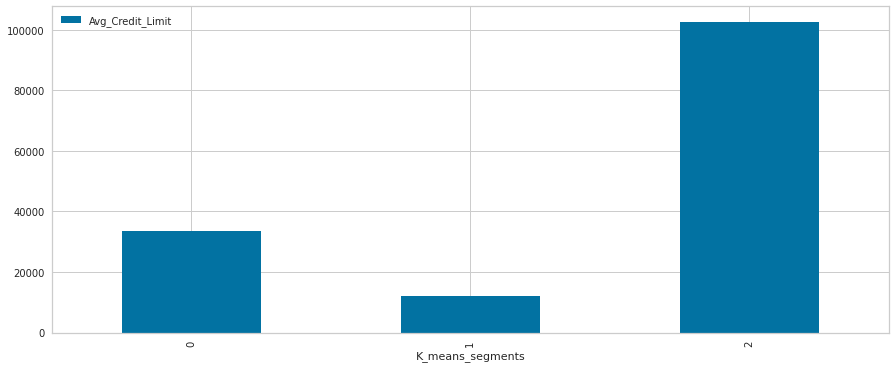

In [127]:
data_k[['Avg_Credit_Limit','K_means_segments']].groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

<AxesSubplot:xlabel='K_means_segments'>

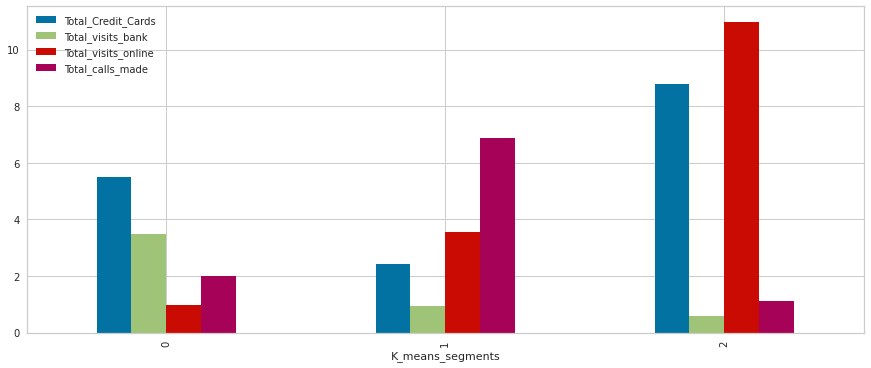

In [128]:
data_k[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'K_means_segments']].groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

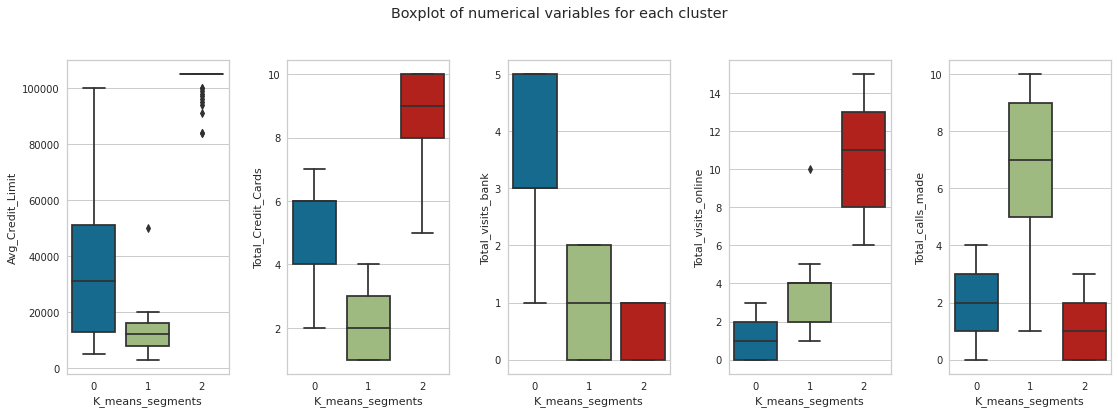

In [129]:
import matplotlib.font_manager

fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_k[col[counter]],x=data_k['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

#  Hierarchical clustering

In [133]:
"""
Code snippet to compare links and distance metrics
"""

methods = ['single','complete','average','weighted']
metric = ['euclidean','chebyshev','cityblock']
i=0
compare = pd.DataFrame(columns = ['Method','Metric','Cophenet Index'])

for m in methods:
    for _metric in metric:
        Z = linkage(subset_scaled_df, method = m, metric =_metric )
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        compare.append([m,_metric,c])
        compare.loc[i] =[m,_metric,c]
        i=i+1

method2 =['ward','centroid']
# Method 'ward' and 'centroid' requires the distance metric to be Euclidean    
for m in method2:
        Z = linkage(subset_scaled_df, method = m, metric ='euclidean' )
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        compare.append([m,'euclidean',c])
        compare.loc[i] =[m,'euclidean',c]
        i=i+1

compare.sort_values(by = 'Cophenet Index', ascending= False).reset_index(drop=True)

,Method,Metric,Cophenet Index
0,average,euclidean,0.890
1,average,cityblock,0.889
2,average,chebyshev,0.888
3,centroid,euclidean,0.885
4,weighted,euclidean,0.875
5,complete,euclidean,0.867
6,complete,cityblock,0.843
7,complete,chebyshev,0.839
8,weighted,cityblock,0.820
9,weighted,chebyshev,0.819


- 'average' gives the best cophenet constant 

0.8894329744104157

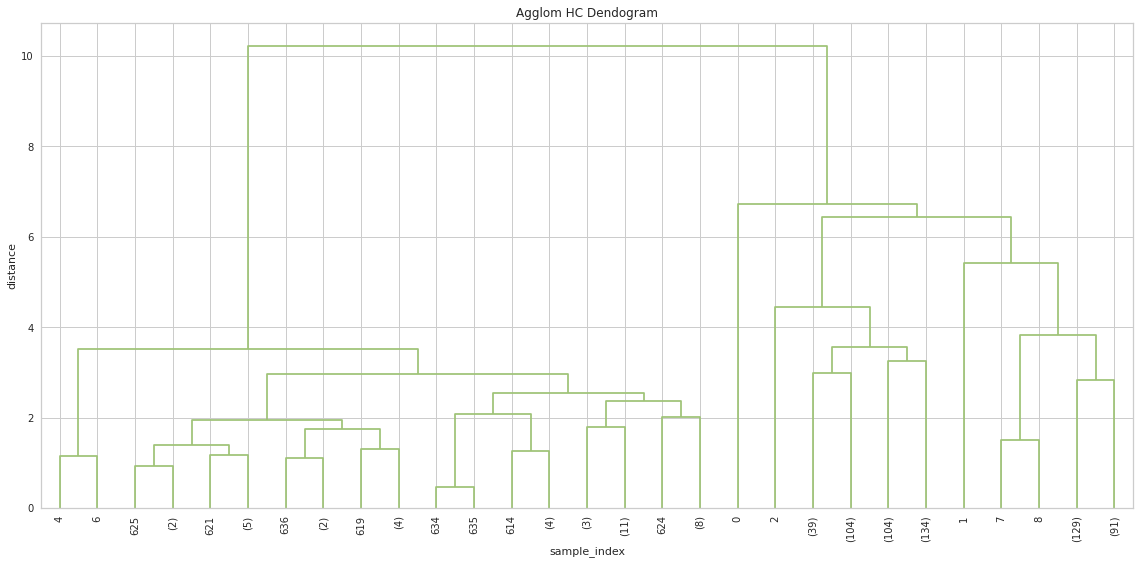

In [135]:
plt.figure(figsize=(16, 8))
plt.title('Agglom HC Dendogram')
plt.xlabel('sample_index')
plt.ylabel('distance')
Z = linkage(subset_scaled_df, method = 'average',metric ='cityblock')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

# Linkage

In [136]:
Z = linkage(subset_scaled_df, 'average', metric='cityblock')
Z.shape

(654, 4)

In [137]:
Z

array([[ 461.        ,  494.        ,    0.        ,    2.        ],
       [ 423.        ,  452.        ,    0.        ,    2.        ],
       [ 250.        ,  360.        ,    0.        ,    2.        ],
       ...,
       [1304.        , 1305.        ,    6.4273379 ,  605.        ],
       [   0.        , 1306.        ,    6.72553137,  606.        ],
       [1301.        , 1307.        ,   10.21707399,  655.        ]])

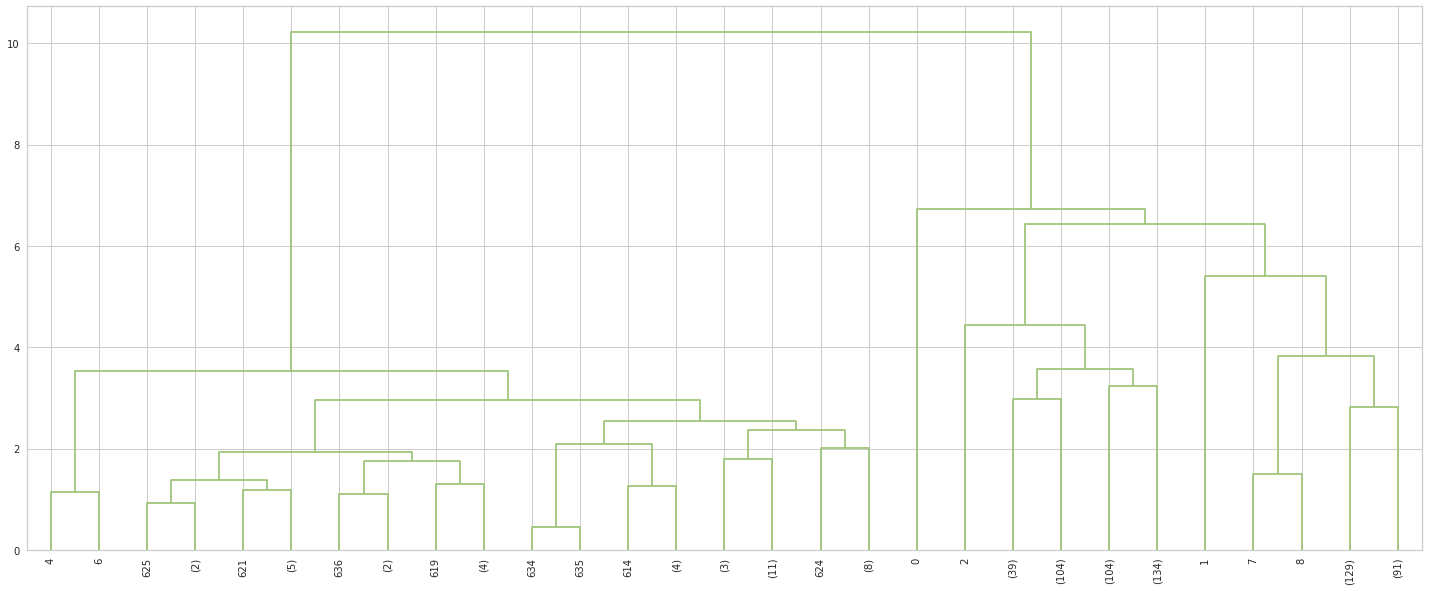

In [139]:
# Consolidated DF 
plt.figure(figsize=(25, 10))
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.show()

# optimal distance between clusters - for truncated dendogram

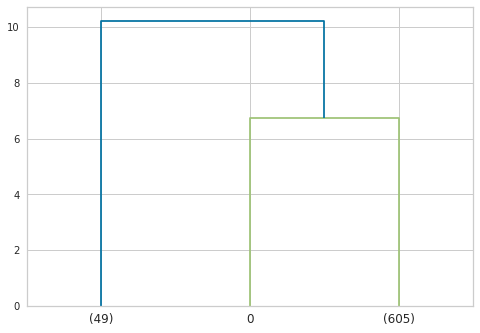

In [140]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

# Use distance max=6 to cluster data

In [141]:
max_d = 6
clusters = fcluster(Z, max_d, criterion='distance')
pd.DataFrame(clusters).value_counts()


2    382
3    223
1     49
4      1
dtype: int64

In [142]:
#Avg Silhoutte Score
silhouette_score(subset_scaled_df,clusters)

0.47402717931880084

# Dendogram - 'complete linkage'

0.8668293924257057

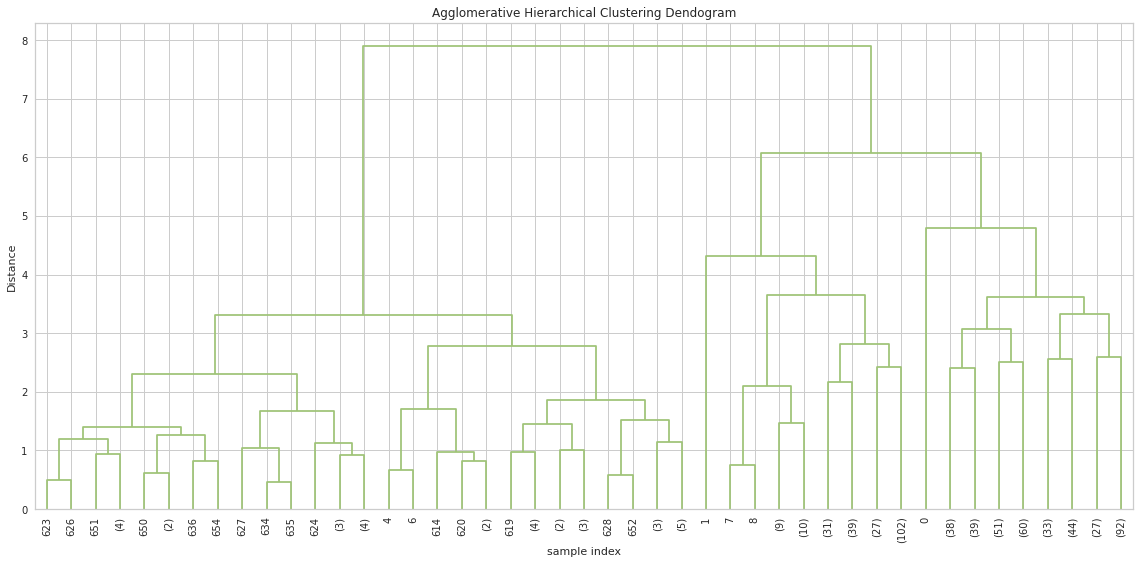

In [143]:
plt.figure(figsize=(16, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subset_scaled_df, method = 'complete',metric ='euclidean')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

In [144]:
max_d = 6
clusters = fcluster(Z, max_d, criterion='distance')
pd.DataFrame(clusters).value_counts()

3    385
2    221
1     49
dtype: int64

In [145]:
silhouette_score(subset_scaled_df,clusters)

0.5071239580569064

### Observations

Sil score is 0.51m, better than in avg linkage

## Arrange cluster number - to see the clusters

In [146]:
df_hc = data.copy()

In [147]:
df_hc['hc_clusters'] = (clusters+1)%3

In [149]:
cluster_profile_hc = df_hc.groupby('hc_clusters').mean()
cluster_profile_hc['count_in_each_segment'] = df_hc.groupby('hc_clusters')['Total_Credit_Cards'].count().values

In [150]:
cluster_profile_hc

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
hc_clusters,,,,,,
0,12149.321,2.389,0.919,3.561,6.910,221
1,33451.948,5.494,3.483,0.992,2.021,385
2,102612.245,8.776,0.592,10.980,1.102,49


# Compar K-means vs Hierarchical clusters

In [151]:
cluster_profile_k

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33604.712,5.505,3.495,0.976,2.005,382
1,12174.107,2.411,0.933,3.554,6.871,224
2,102612.245,8.776,0.592,10.980,1.102,49


In [152]:
cluster_profile_hc

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
hc_clusters,,,,,,
0,12149.321,2.389,0.919,3.561,6.910,221
1,33451.948,5.494,3.483,0.992,2.021,385
2,102612.245,8.776,0.592,10.980,1.102,49


### Observations
- k-means and hiearachical are similar in profie

# Cluster profiling and Insights

In [153]:
cluster_profile_k

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33604.712,5.505,3.495,0.976,2.005,382
1,12174.107,2.411,0.933,3.554,6.871,224
2,102612.245,8.776,0.592,10.980,1.102,49


<AxesSubplot:xlabel='K_means_segments'>

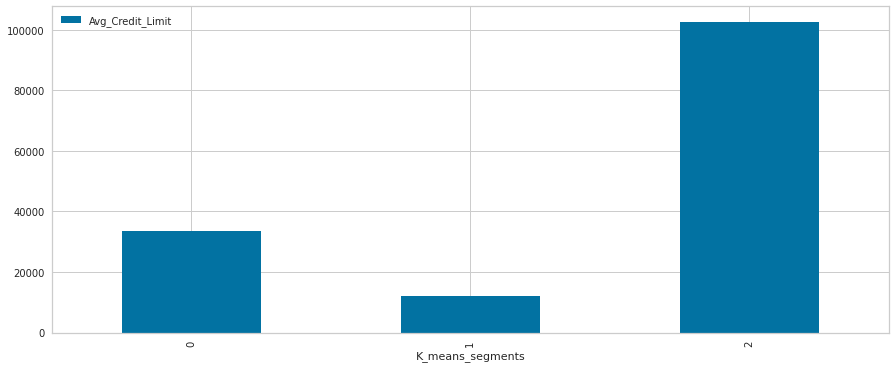

In [155]:
data_k[['Avg_Credit_Limit','K_means_segments']].groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

<AxesSubplot:xlabel='K_means_segments'>

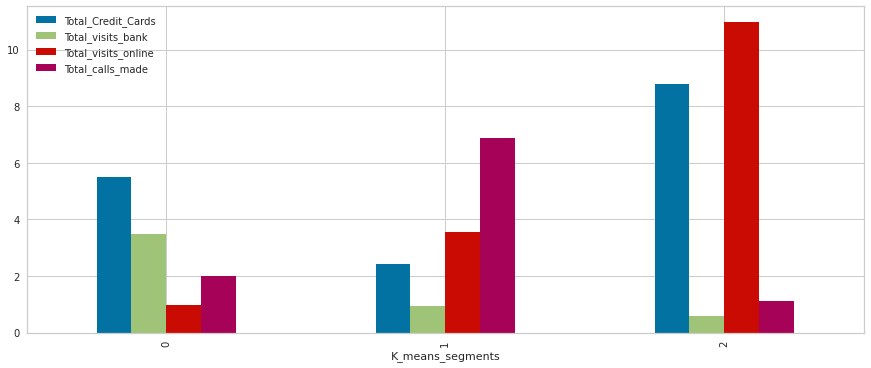

In [156]:
data_k[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'K_means_segments']].groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

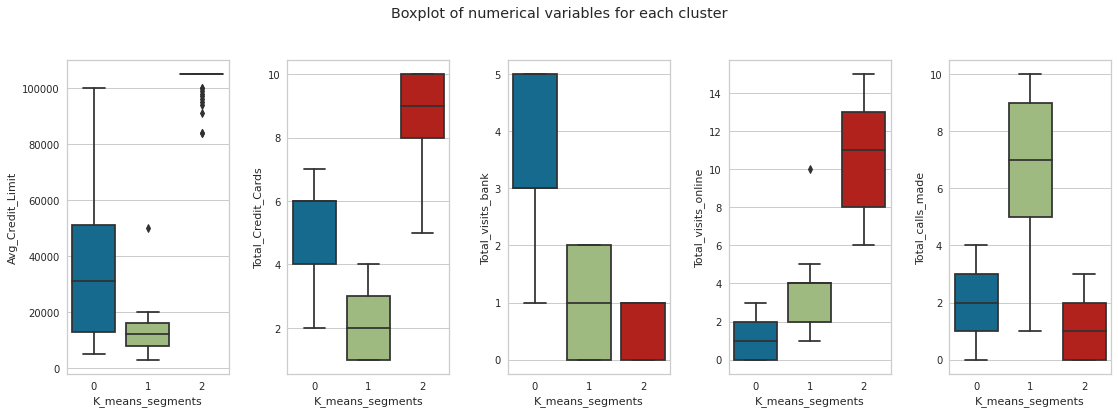

In [159]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_k[col[counter]],x=data_k['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

# Cluster profile - summary

In [160]:
pd.DataFrame([['Cluster-0','Average Credit Customer','Visiting Banks','Average',382],['Cluster-1','Low Credit Customer','Calls','Low',224]
              ,['Cluster-2','High Credit Customer','Online','High',49]], 
             columns=['Customer Segment','Credit Amount','Preferred Customer Support Channel',
                      'Number of Credit Card','Customer Count in the segment'])

,Customer Segment,Credit Amount,Preferred Customer Support Channel,Number of Credit Card,Customer Count in the segment
0,Cluster-0,Average Credit Customer,Visiting Banks,Average,382
1,Cluster-1,Low Credit Customer,Calls,Low,224
2,Cluster-2,High Credit Customer,Online,High,49


### Observations
- Customers in  Cluster-0 -> average credit customers,reach out for support through vsisiting banks.
- Customers in  Cluster-1 -> low credit customers with less cards and reach out for support predominantly through call support and online.
- Customers in Cluster-2 -> high credit ustomers with higher number of cards and reach out for support mainly through call online support

#  Actionable Insights & Recommendations

-  Average Credit Limit, Total Number of Credit Cards and Customer Support Channels - define customer segments
- Avg credit limit - customers with low income buy (credit info), buy basic/delux package
- Total num of credit cards - strong corre between packages and age of customer
- Customer support channels - duration of presentation (pitch) shows great correlation in get a deal

Overall, customer segmentation based on attributes and target-based marketing of product can help company to focus on acquiring a greater market share